In [1]:
# Import all required libraries for the analysis

from pyforest import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 200)
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas_profiling
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the csv file in a pandas dataframe
housing=pd.read_csv("train.csv")

In [3]:
# Check first few rows
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# checking the general information of the dataset to get an idea
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Check duplicated in the dataset

In [5]:
duplicateRowsDF = housing[housing.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


### There are no duplicates

In [6]:
# Using pandas profiling feature to get a profile report to get a holistic view of the dataset
housing.profile_report()

In [7]:
housing_1=housing.drop(["Alley","Fence","FireplaceQu","MiscFeature","PoolQC"], axis=1)

In [8]:
housing_2=housing_1.drop(["3SsnPorch","BsmtFinSF2","EnclosedPorch","LowQualFinSF","MiscVal","PoolArea","ScreenPorch"], axis=1)

## Lets look at the remaining columns now

In [9]:
# Column wise missing values %
round(housing_2.isnull().sum()/housing_2.shape[0]*100,2)[0:25]

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
dtype: float64

### Lets look at LotFrontage columns first

In [10]:
housing_2.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

#### Since the values are uniformly distributed and 70 mean seems a reasonable value to impute the missing value


In [11]:
housing_2["LotFrontage"]=housing_2.LotFrontage.fillna(housing_2.LotFrontage.mean())

In [12]:
housing_2["LotFrontage"].isnull().any()

False

In [13]:
housing_2.LotFrontage.mean()

70.04995836802642

### Lets look at other columns with missing values
### Also Lets see how the values are distributed in these columns

In [14]:
for col in housing_2.columns[housing_2.isnull().sum()/housing_2.shape[0]*100 > 0]:
    print("{} : {}".format(col, round(housing_2[col].isnull().sum()/housing_2.shape[0]*100,2)))
    print("  ")
    print(housing_2[col].value_counts())
    print("_________________")
    print("  ")

MasVnrType : 0.55
  
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
_________________
  
MasVnrArea : 0.55
  
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
_________________
  
BsmtQual : 2.53
  
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
_________________
  
BsmtCond : 2.53
  
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
_________________
  
BsmtExposure : 2.6
  
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
_________________
  
BsmtFinType1 : 2.53
  
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
_________________
  
BsmtFinType2 : 2.6
  
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
_________________
  
Electrica

### Below are some columns in which more than 90% records have a single value, which makes this column least informative, and I decide to drop them

In [15]:
skewed_col=["BsmtCond","BsmtFinType2","Electrical","GarageQual","GarageCond"]
housing_3=housing_2.drop(skewed_col, axis=1)

In [16]:
for col in housing_3.columns[housing_3.isnull().sum()/housing_3.shape[0]*100 > 0]:
    print("{} : {}".format(col, round(housing_3[col].isnull().sum()/housing_3.shape[0]*100,2)))
    print("  ")
    print(housing_3[col].value_counts())
    print("_________________")
    print("  ")

MasVnrType : 0.55
  
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
_________________
  
MasVnrArea : 0.55
  
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
_________________
  
BsmtQual : 2.53
  
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
_________________
  
BsmtExposure : 2.6
  
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
_________________
  
BsmtFinType1 : 2.53
  
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
_________________
  
GarageType : 5.55
  
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
_________________
  
GarageYrBlt : 5.55
  
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0 

## Column "MasVnrType" have very less ~ 5% missing values. So, I decide to drop the rows with missing values for this column

In [17]:
housing_4=housing_3[~housing_3["MasVnrType"].isna()]

In [18]:
housing_4.shape

(1452, 64)

In [19]:
housing_3.shape

(1460, 64)

### Only 8 records are dropped. So its not bad

#### So NA dont really means null value - NA in this column refers to No Basement. 

In [20]:
housing_4["BsmtQual"].value_counts()

TA    648
Gd    612
Ex    120
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
(housing_4["BsmtQual"].isnull()).sum()

37

### We see there are 37 records which are reflected as NaN in "BsmtQual"...which actually is not null, but it means "No Basement". Hence replace null with "NB"

In [22]:
housing_4["BsmtQual"]=housing_4["BsmtQual"].fillna(value="NB")

In [23]:
(housing_4["BsmtQual"].isnull()).sum()

0

In [24]:
housing_4["BsmtQual"].value_counts()

TA    648
Gd    612
Ex    120
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
housing_4.shape

(1452, 64)

### Hence Basement Exposure also needs similar treatment as Basement Quality column

In [26]:
housing_4["BsmtExposure"]=housing_4["BsmtExposure"].fillna(value="NB")

In [27]:
housing_4["BsmtExposure"].value_counts()

No    946
Av    221
Gd    133
Mn    114
NB     38
Name: BsmtExposure, dtype: int64

### Hence BsmtFinType1 also needs similar treatment as Basement Quality column

In [28]:
housing_4["BsmtFinType1"]=housing_4["BsmtFinType1"].fillna(value="NB")

In [29]:
housing_4["BsmtFinType1"].value_counts()

Unf    428
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
NB      37
Name: BsmtFinType1, dtype: int64

## Hence NA in Garage type basically means "No Garage", hence will replace null values with "NG"

In [30]:
housing_4["GarageType"]=housing_4["GarageType"].fillna(value="NG")

In [31]:
housing_4["GarageType"].value_counts()

Attchd     863
Detchd     387
BuiltIn     87
NG          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

### Now "GarageYrBlt: Year garage was built" is the column which is related top "Garage Type" column.
### Since there is no garage in few houses, hence the year garage built is also reflected as null. Now since this field is a date field, replacing it with some value will disrupt the type of this column, and any future datetime calculations will be difficult. Hence, it would be better to drop the rows which has no garage.

In [32]:
housing_4["GarageYrBlt"].isna().sum()

81

In [33]:
housing_5 = housing_4[~housing_4["GarageYrBlt"].isna()]

In [34]:
housing_5.shape

(1371, 64)

In [35]:
housing_4.shape

(1452, 64)

In [36]:
1452-1371

81

## 81 records were dropped

## Null values of Column "GarageFinish" should also have been dropped with the above treatment

In [37]:
housing_5["GarageFinish"].isnull().any()

False

# Lets see if all the missing values have been treated properly

In [38]:
housing_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 64 columns):
Id               1371 non-null int64
MSSubClass       1371 non-null int64
MSZoning         1371 non-null object
LotFrontage      1371 non-null float64
LotArea          1371 non-null int64
Street           1371 non-null object
LotShape         1371 non-null object
LandContour      1371 non-null object
Utilities        1371 non-null object
LotConfig        1371 non-null object
LandSlope        1371 non-null object
Neighborhood     1371 non-null object
Condition1       1371 non-null object
Condition2       1371 non-null object
BldgType         1371 non-null object
HouseStyle       1371 non-null object
OverallQual      1371 non-null int64
OverallCond      1371 non-null int64
YearBuilt        1371 non-null int64
YearRemodAdd     1371 non-null int64
RoofStyle        1371 non-null object
RoofMatl         1371 non-null object
Exterior1st      1371 non-null object
Exterior2nd      1371 non

In [39]:
housing_5.isnull().any().sum()

0

## So now we see none of the columns have any missing values

# Lets check percentage of dropped columns and rows

In [40]:
print("Dropped rows % :",round(100 - (housing_5.shape[0]/housing.shape[0]*100),2))
print("Dropped cols % :",round(100 - (housing_5.shape[1]/housing.shape[1]*100),2))

Dropped rows % : 6.1
Dropped cols % : 20.99


## Now lets try to understand the remaining columns

In [41]:
housing_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 64 columns):
Id               1371 non-null int64
MSSubClass       1371 non-null int64
MSZoning         1371 non-null object
LotFrontage      1371 non-null float64
LotArea          1371 non-null int64
Street           1371 non-null object
LotShape         1371 non-null object
LandContour      1371 non-null object
Utilities        1371 non-null object
LotConfig        1371 non-null object
LandSlope        1371 non-null object
Neighborhood     1371 non-null object
Condition1       1371 non-null object
Condition2       1371 non-null object
BldgType         1371 non-null object
HouseStyle       1371 non-null object
OverallQual      1371 non-null int64
OverallCond      1371 non-null int64
YearBuilt        1371 non-null int64
YearRemodAdd     1371 non-null int64
RoofStyle        1371 non-null object
RoofMatl         1371 non-null object
Exterior1st      1371 non-null object
Exterior2nd      1371 non

#### Let us do univariate and bivariate analysis on the current data set

In [42]:
#plot univariate distribution graphs for continuous variable
def plot_univariate(df):
    fig = plt.figure(figsize=(15,15))
    num=1
    for col in df.columns[df.dtypes != 'object']:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        num+=1
        sns.boxplot(df[col], ax=ax_box)
        sns.distplot(df[col], ax=ax_hist)
        ax_box.set(xlabel='')
    plt.tight_layout()
    plt.show()

<Figure size 1080x1080 with 0 Axes>

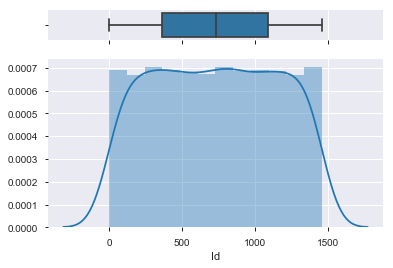

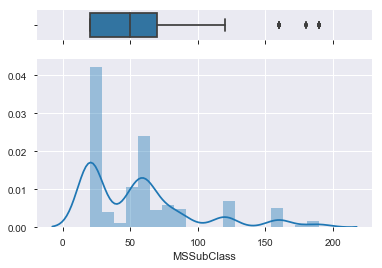

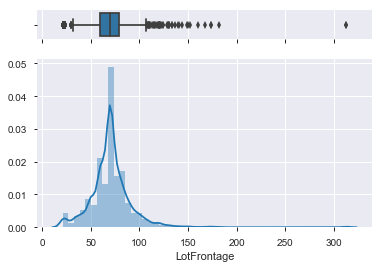

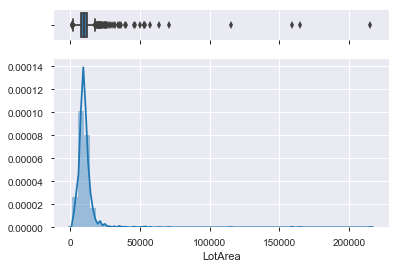

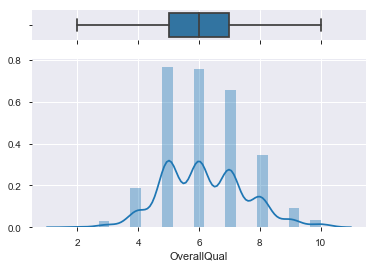

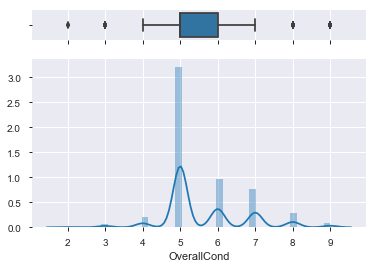

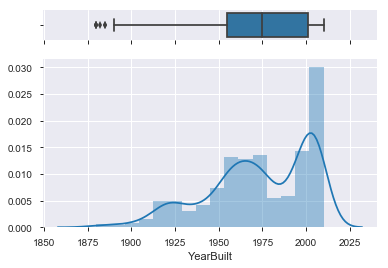

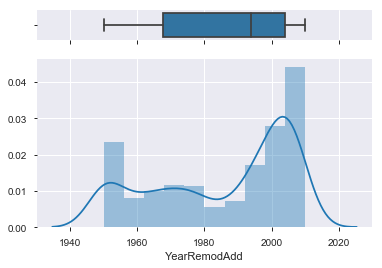

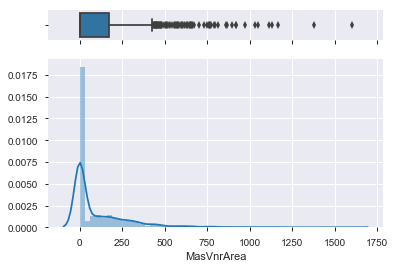

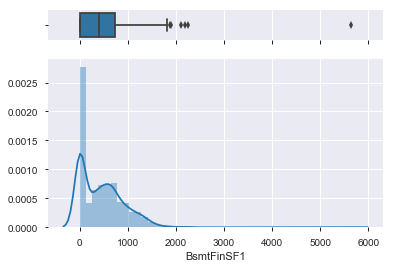

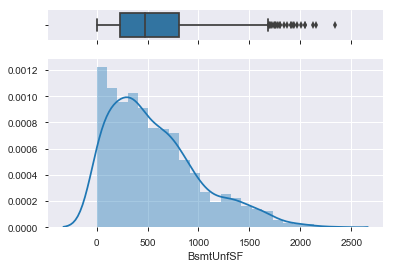

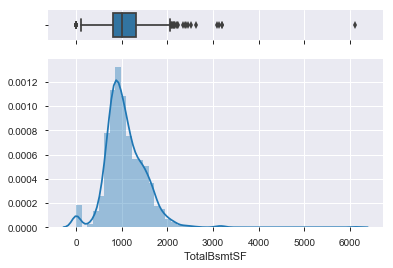

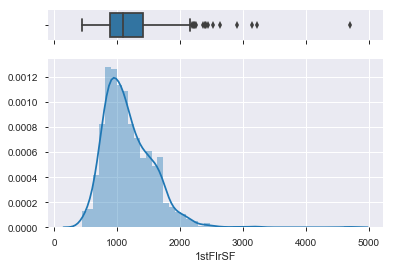

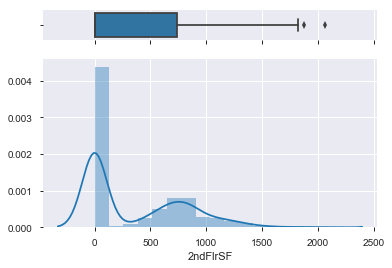

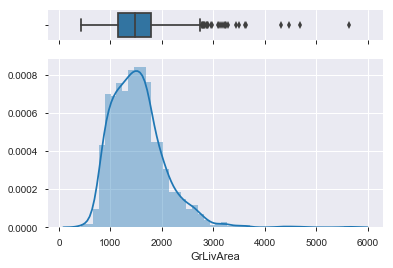

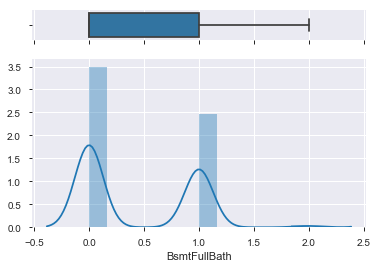

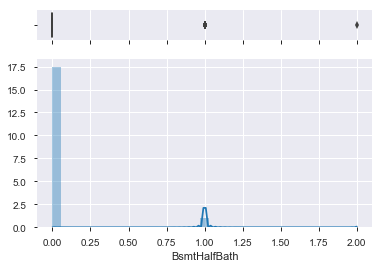

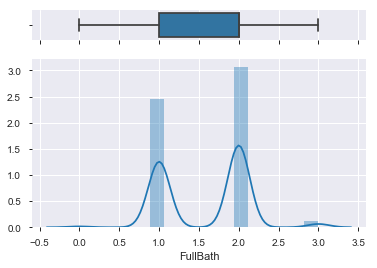

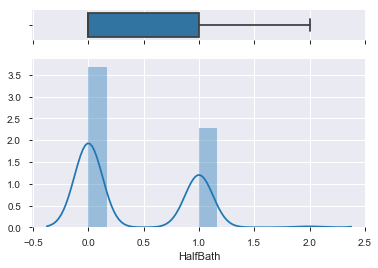

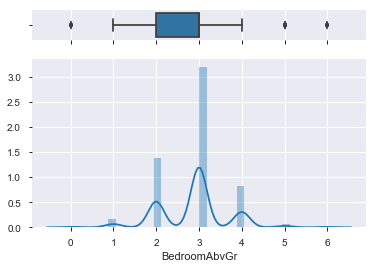

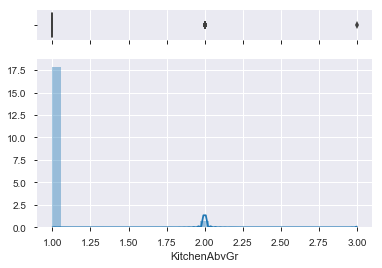

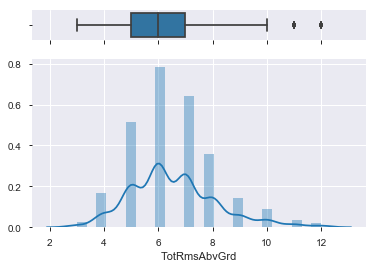

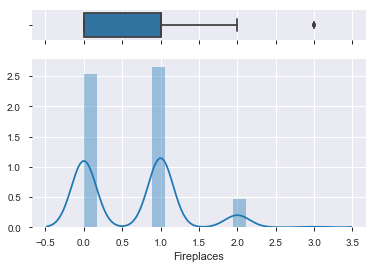

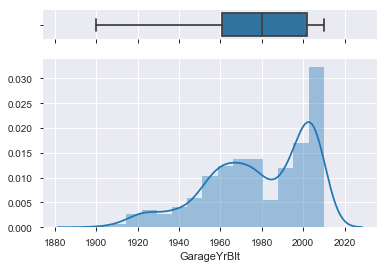

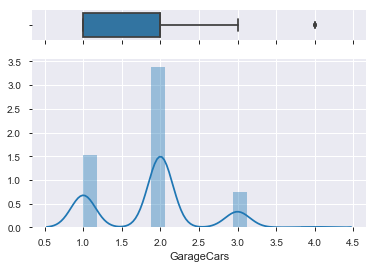

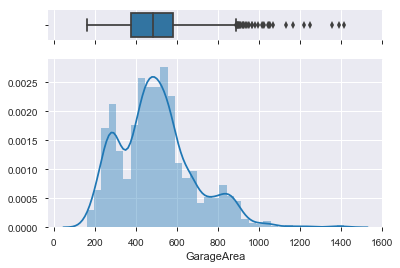

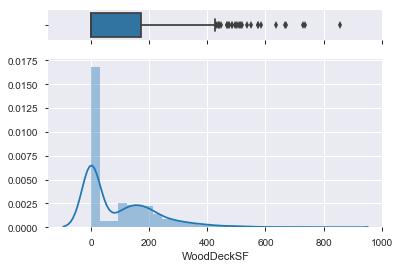

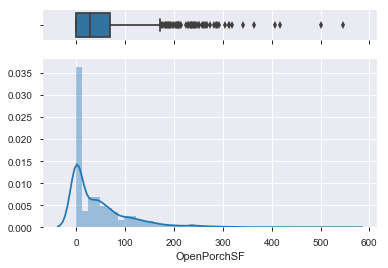

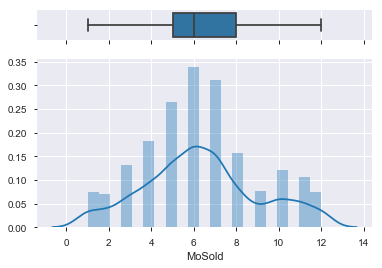

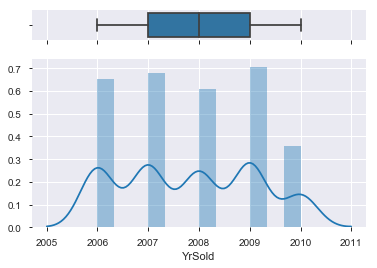

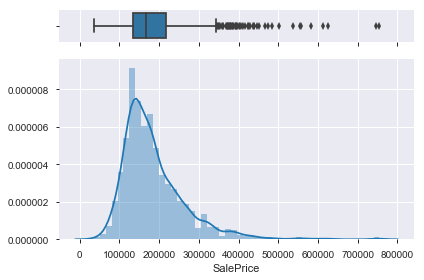

In [43]:
plot_univariate(housing_5)

## First thing to notice in the above plots is that two columns have highly skewed values -

- BsmtHalfBath
- KitchenAbvGr


In [44]:
housing_5.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [45]:
housing_5.BsmtHalfBath.value_counts()

0    1291
1      79
2       1
Name: BsmtHalfBath, dtype: int64

In [46]:
housing_5.KitchenAbvGr.value_counts()

1    1320
2      50
3       1
Name: KitchenAbvGr, dtype: int64

## Looking at the above distribution, its conclusive that these columns have very minimal information as nearly 90% rows have similar value. Hence will drop these two columns

In [47]:
housing_6=housing_5.drop(["BsmtHalfBath","KitchenAbvGr"], axis=1)

In [48]:
housing_6.shape

(1371, 62)

#### Looks like there are ouliers so let us treat them with IQR technique

In [49]:
shape_before=housing_6.shape
Q1 = housing_6.quantile(0.25)
Q3 = housing_6.quantile(0.75)
IQR = Q3 - Q1
housing_7 = housing_6[~((housing_6 < (Q1 - 2.5 * IQR)) |(housing_6 > (Q3 + 2.5 * IQR))).any(axis=1)]
shape_after=housing_7.shape
print(shape_before, ' >> ', shape_after)

(1371, 62)  >>  (1219, 62)


## After oulier treatment, lets see the plots again

<Figure size 1080x1080 with 0 Axes>

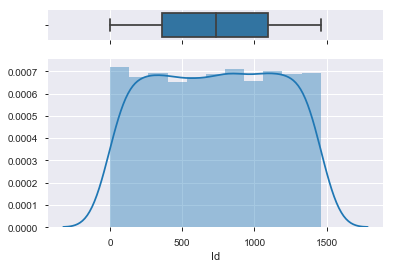

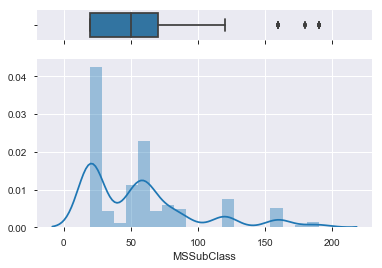

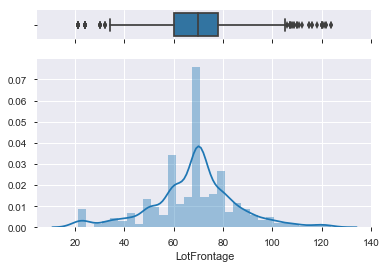

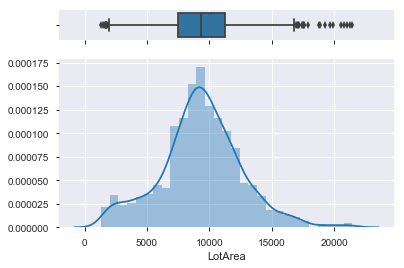

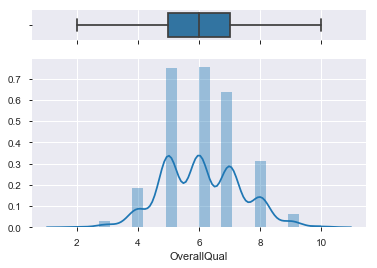

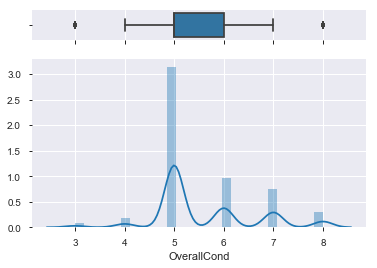

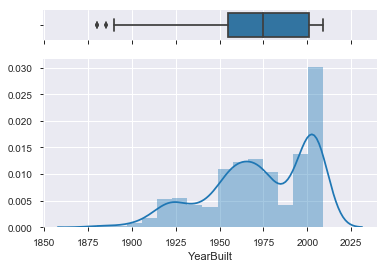

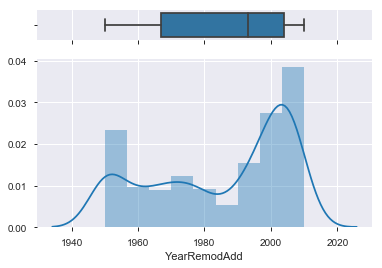

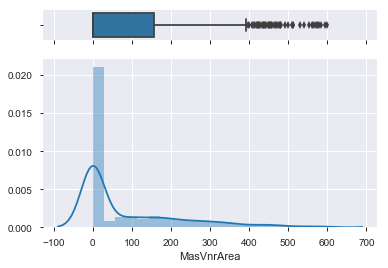

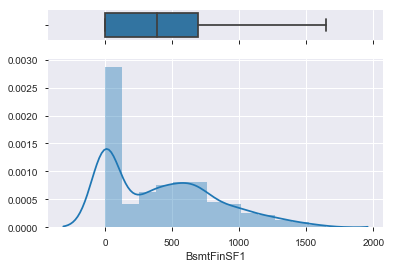

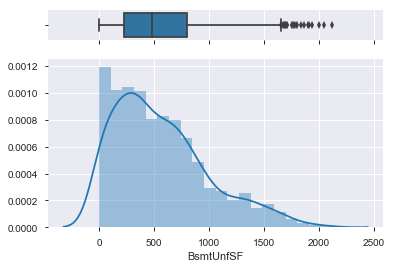

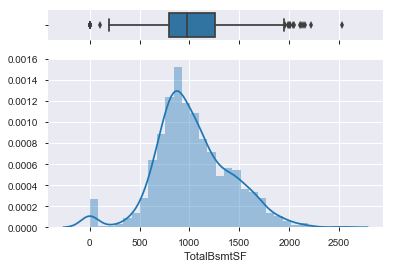

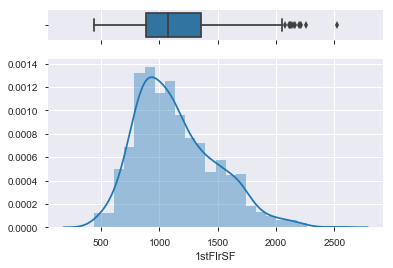

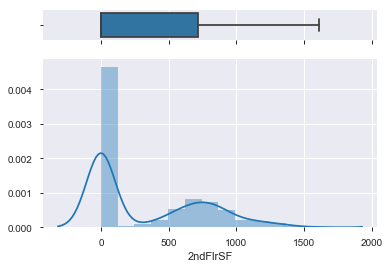

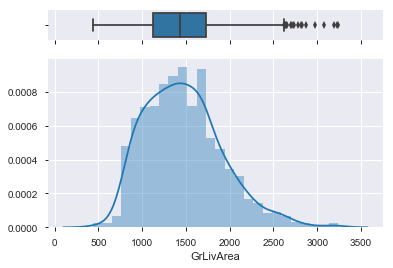

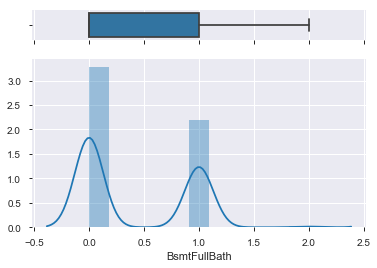

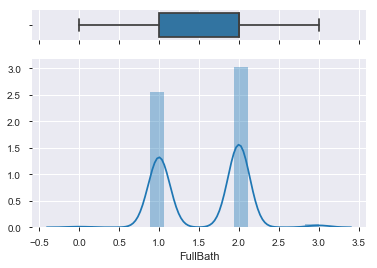

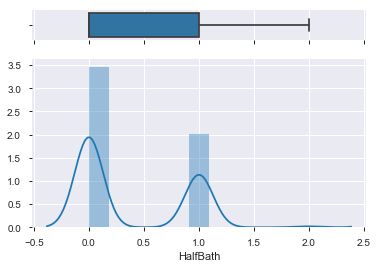

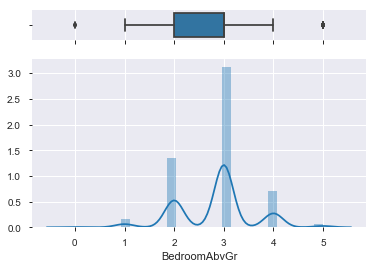

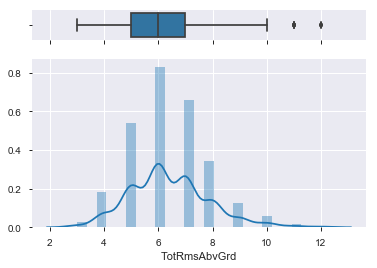

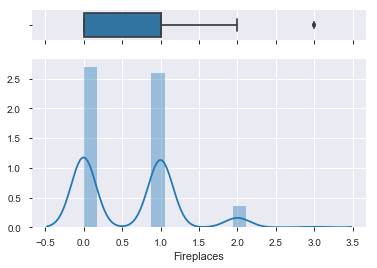

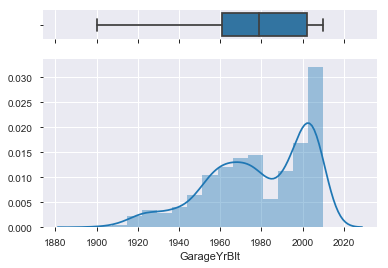

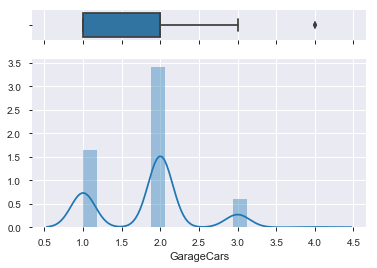

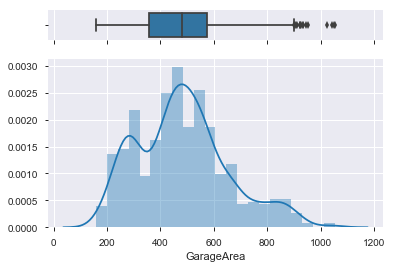

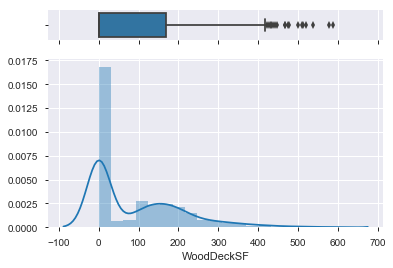

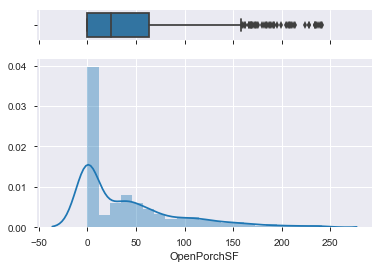

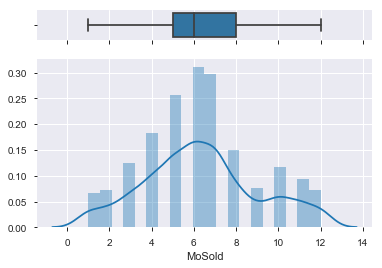

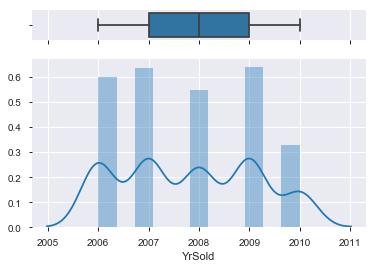

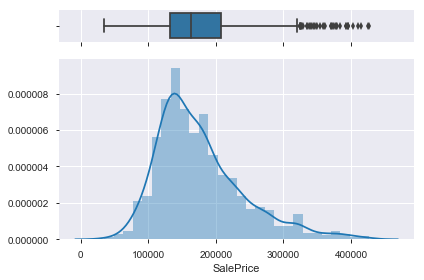

In [50]:
plot_univariate(housing_7)

In [51]:
housing_7.shape

(1219, 62)

In [52]:
housing.shape

(1460, 81)

In [53]:
print("Dropped rows % :",round(100 - (housing_7.shape[0]/housing.shape[0]*100),2))
print("Dropped cols % :",round(100 - (housing_7.shape[1]/housing.shape[1]*100),2))

Dropped rows % : 16.51
Dropped cols % : 23.46


## With skewed column and outlier treatment, we lost only ~20% rows and columns, which is acceptable

# Lets now try to understand the categorical variables

In [54]:
for col in housing_7.columns[housing_7.dtypes == 'object']:
    print("  ")
    print(housing_7[col].value_counts())
    print("_________________")
    print("  ")

  
RL         968
RM         175
FV          57
RH          12
C (all)      7
Name: MSZoning, dtype: int64
_________________
  
  
Pave    1217
Grvl       2
Name: Street, dtype: int64
_________________
  
  
Reg    785
IR1    405
IR2     25
IR3      4
Name: LotShape, dtype: int64
_________________
  
  
Lvl    1115
Bnk      48
HLS      38
Low      18
Name: LandContour, dtype: int64
_________________
  
  
AllPub    1218
NoSeWa       1
Name: Utilities, dtype: int64
_________________
  
  
Inside     886
Corner     216
CulDSac     75
FR2         39
FR3          3
Name: LotConfig, dtype: int64
_________________
  
  
Gtl    1168
Mod      48
Sev       3
Name: LandSlope, dtype: int64
_________________
  
  
NAmes      200
CollgCr    146
OldTown     90
Somerst     77
Edwards     73
Gilbert     68
NWAmes      68
Sawyer      67
NridgHt     57
SawyerW     54
BrkSide     45
Crawfor     43
Mitchel     34
Timber      28
IDOTRR      27
NoRidge     25
StoneBr     20
SWISU       19
Blmngtn     17
Cle

# With above stats its quite clear that the below 5 columns are highly skewed and hence contains very less information, hence should be dropped -
- Street
- Utilities
- Condition2
- RoofMatl
- Heating


In [55]:
housing_8=housing_7.drop(["Street","Utilities","Condition2","RoofMatl","Heating"], axis=1)

In [56]:
housing_8.shape

(1219, 57)

## Encoding for below columns which has a weight in their values --

In [57]:
cleanup_variables = {"ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd":3, "Ex":4 },
                    "ExterCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd":3, "Ex":4 },
                    "BsmtQual" : {"NB": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5 },
                    "BsmtExposure": {"NB": 0, "No": 1, "Mn": 2, "Av": 3, "Gd":4 },
                    "HeatingQC" : {"Po": 0, "Fa": 1, "TA": 2, "Gd":3, "Ex":4 },
                    "CentralAir" : {"N": 0, "Y": 1 },
                    "KitchenQual" : {"Po": 0, "Fa": 1, "TA": 2, "Gd":3, "Ex":4 }
                    }

In [58]:
housing_9 = housing_8.replace(cleanup_variables)

In [59]:
housing_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1458
Data columns (total 57 columns):
Id               1219 non-null int64
MSSubClass       1219 non-null int64
MSZoning         1219 non-null object
LotFrontage      1219 non-null float64
LotArea          1219 non-null int64
LotShape         1219 non-null object
LandContour      1219 non-null object
LotConfig        1219 non-null object
LandSlope        1219 non-null object
Neighborhood     1219 non-null object
Condition1       1219 non-null object
BldgType         1219 non-null object
HouseStyle       1219 non-null object
OverallQual      1219 non-null int64
OverallCond      1219 non-null int64
YearBuilt        1219 non-null int64
YearRemodAdd     1219 non-null int64
RoofStyle        1219 non-null object
Exterior1st      1219 non-null object
Exterior2nd      1219 non-null object
MasVnrType       1219 non-null object
MasVnrArea       1219 non-null float64
ExterQual        1219 non-null int64
ExterCond        1219 non

# Year column treatment

In [60]:
housing_9[["YearBuilt", "YearRemodAdd", "GarageYrBlt","YrSold"]][:1]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008

## We can create a derived metrics to find the age of each year column by subtratcing it from current year

In [61]:
from datetime import datetime
# current date and time
now = datetime.now()
dt = now.strftime("%Y")
current_year=int(dt)
current_year

2019

In [62]:
housing_9["YearBuilt_age"]=current_year-housing_9["YearBuilt"]
housing_9["YearRemodAdd_age"]=current_year-housing_9["YearRemodAdd"]
housing_9["GarageYrBlt_age"]=current_year-housing_9["GarageYrBlt"]
housing_9["YrSold_age"]=current_year-housing_9["YrSold"]

In [63]:
housing_9.head(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0            7            5       2003          2003     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual ExterCond Foundation  \
0     VinylSd    BrkFace       196.0          3         2      PConc   

   BsmtQual  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1          GLQ         706        150          856   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          4           1       856       854       1710             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         2         1             3            3             8        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd       2003.0          RFn           2         548   

  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold SaleType SaleCondition  \
0          Y           0           61       2    2008       WD        Normal   

   SalePrice  YearBuilt_age  YearRemodAdd_age  GarageYrBlt_age  YrSold_age  
0     208500             16                16             16.0          11

In [64]:
housing_10=housing_9.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt","YrSold"], axis=1)

In [65]:
housing_10.shape

(1219, 57)

# For remaining categorical variables, values seems to be all independent, hence will create dummy for all variables

In [66]:
# Creating dummy variables for the categorical fields and dropping the first one.
cols = [col for col in housing_10.describe(include='object').columns]
dummy1 = pd.get_dummies(housing_10[cols], drop_first=True)
housing_11 = pd.concat([housing_10, dummy1], axis=1)
housing_11 = housing_11.drop(columns=cols)

In [67]:
housing.shape

(1460, 81)

In [68]:
housing_11.shape

(1219, 170)

In [69]:
# Removing ID column
housing_11.drop(["Id"], axis=1, inplace=True)

In [70]:
housing_11.head(1)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0          3         4             1         706        150          856   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          4           1       856       854       1710             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0         2         1             3            3             8           0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  SalePrice  \
0           2         548           0           61       2     208500   

   YearBuilt_age  YearRemodAdd_age  GarageYrBlt_age  YrSold_age  MSZoning_FV  \
0             16                16             16.0          11            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   

   Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                     0                 0                1                0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0                0                0                0                0   

   Condition1_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0                0                0                0               0   

   BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0                0                  0                  0                  0   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0                  0                  1                  0                0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   

   RoofStyle_Shed  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0               0                    0                    0   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                   0                    0                    0   

   Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0                    0                    0                    0   

   Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0                  0                   0                    1   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_Asp

# Date Cleaning completed

# Distribute in X and y

In [71]:
# split into X and y
y = housing_11.pop('SalePrice')

X = housing_11.loc[:, housing_11.columns]

In [72]:
X.shape

(1219, 168)

In [73]:
y.shape

(1219,)

# Scaling

In [74]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
#y = pd.DataFrame(scale(y))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)

In [75]:
X.head(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.093592    -0.197244 -0.265839     0.714569    -0.562999    0.806211   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0   1.140819  0.601703     -0.576297    0.692919  -0.961538    -0.472645   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0    0.88861    0.233449 -0.827112  1.260947   0.536235       1.17549   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0  0.844895  1.245784      0.219437     0.774483       1.09968    -0.95548   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF    MoSold  YearBuilt_age  \
0    0.289167    0.373133   -0.795026     0.378074 -1.609712      -1.040514   

   YearRemodAdd_age  GarageYrBlt_age  YrSold_age  MSZoning_FV  MSZoning_RH  \
0         -0.885025        -1.009619   -0.146485     -0.22148     -0.09971   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0     0.509213     -0.40942       -0.1447     -0.057378       0.74355   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0        -0.179377        -0.122423         0.305407          -0.256046   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0      -0.181799       -0.04967          0.613063      -0.202461   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0       -0.04967             -0.040539            -0.107788   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0             -0.195782             -0.111618              2.710962   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0             -0.191219             -0.252388             -0.243062   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0            -0.150503             -0.095425             -0.169387   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0           -0.443025             -0.086244            -0.243062   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0               -0.1447              -0.22148             -0.282341   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0           -0.125831            -0.241163             -0.215295   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0             -0.259664             -0.129153            -0.153329   

   Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0             -0.090947         -0.229515         0.385897        -0.064176   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0        -0.115326        -0.090947         -0.13557        -0.040539   

   Condition1_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0        -0.064176        -0.118925        -0.169387       -0.179377   

   BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0        -0.305407          -0.095425          -1.002464          -0.057378   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0          -0.081278           1.532613          -0.158844        -0.233449   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0         0.497692          -0.081278      -0.470577          -0.070331   

   RoofStyle_Shed  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0       -0.028653            -0.040539            -0.193512   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0           -0.028653             -0.18656            -0.433716   

   Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0            -0.028653            -0.425678            -0.284031   

   Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0          -0.028653           -0.129153             1.318835   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  \
0       

In [76]:
y.head(1)

0    208500
Name: SalePrice, dtype: int64

In [77]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [78]:
X_train.shape

(853, 168)

In [79]:
X_test.shape

(366, 168)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting sale prices using ridge and lasso regression.

## Ridge Regression

In [80]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [81]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003750      0.002654         0.000760        0.000051      0.0001   
1       0.002119      0.000107         0.000707        0.000012       0.001   
2       0.002010      0.000013         0.000708        0.000011        0.01   
3       0.002035      0.000026         0.000724        0.000020        0.05   
4       0.002099      0.000053         0.000718        0.000011         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -15129.311604      -16640.384727      -16722.633420   
1   {'alpha': 0.001}      -15129.014058      -16639.573301      -16722.100913   
2    {'alpha': 0.01}      -15126.063881      -16631.555115      -16716.813409   
3    {'alpha': 0.05}      -15113.481152      -16598.037250      -16694.111198   
4     {'alpha': 0.1}      -15098.856530      -16567.490604      -16667.441036   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -14279.560676      -16895.043035    -15934.198146     1041.200263   
1      -14279.014114      -16894.872871    -15933.726239     1041.197043   
2      -14273.573248      -16893.180788    -15929.045870     1041.176146   
3      -14249.921329      -16885.857403    -15909.079772     1041.328001   
4      -14221.509591      -16877.103123    -15887.270737     1042.905061   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -11437.671803       -11249.473799   
1               26       -11437.656788       -11249.428218   
2               25       -11437.508545       -11248.976007   
3               24       -11436.940858       -11247.157301   
4               23       -11436.389972       -11245.167835   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11252.760334       -11676.952743       -11136.366339   
1       -11252.788545       -11676.970323       -11136.381431   
2       -11253.067703       -11677.142772       -11136.531191   
3       -11254.319881       -11677.866146       -11137.171800   
4       -11256.100249       -11678.657085       -11137.927803   

   mean_train_score  std_train_score  
0     -11350.645004       189.622136  
1     -11350.645061       189.625350  
2     -11350.645243       189.656904  
3     -11350.691197       189.778651  
4     -11350.848589       189.871888

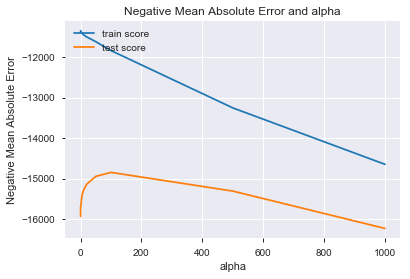

In [82]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [83]:
best_alpha=model_cv.best_params_['alpha']
best_alpha

100

## With above graph and the 'best_param' method tells that best alpha = 100

In [84]:
alpha = best_alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.18675117e+03,  9.12127095e+02,  4.69112100e+03,  9.00178047e+03,
        3.79194137e+03,  1.88667175e+03,  3.45569467e+03,  3.34760018e+03,
        3.29525642e+03,  4.84197958e+03, -7.12862125e+02,  6.01490139e+03,
        5.08840252e+02,  1.50593689e+02,  5.43062812e+03,  4.67734546e+03,
        8.67160807e+03,  1.52396466e+03,  1.43980333e+03,  1.83606457e+03,
        3.14718324e+02,  3.21156826e+03,  2.68348012e+03,  2.54692139e+03,
        2.15876199e+03,  3.53301499e+03,  1.54101412e+03,  2.33115268e+03,
       -2.84717525e+02, -3.27362039e+03, -2.18340662e+03, -9.13629819e+02,
       -2.26651010e+02,  1.55117377e+03, -1.67922577e+02,  1.09862885e+03,
        2.05488732e+02, -2.69279462e+02,  1.57757055e+02,  6.27557432e+02,
        1.69879971e+03, -1.79128562e+03, -9.00215920e+02,  1.52089531e+03,
       -1.06833996e+03, -6.69480665e+02,  5.06232009e+02,  7.75270772e+02,
       -4.61880978e+02,  1.87174949e+02,  1.89995351e+03,  1.01251182e+03,
        4.35027927e+02, -

In [85]:
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9276082168901031
0.9051973272469441


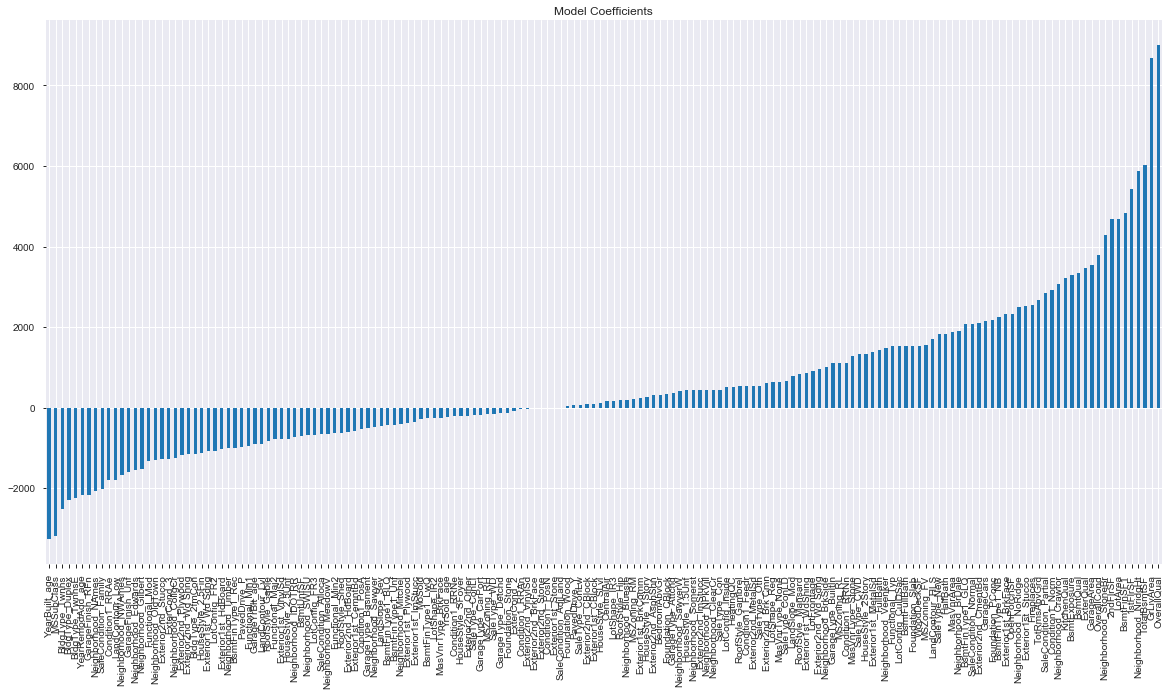

In [86]:
# plotting the magnitude of coefficients

plt.figure(figsize=[20,10])
predictors = X_train.columns
coef = Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [87]:
coeff_df = pd.Series(ridge.coef_, index = X.columns)

In [88]:
pd.DataFrame(coeff_df.sort_values(ascending=False))[:20]

0
OverallQual            9001.780467
GrLivArea              8671.608073
TotalBsmtSF            6014.901392
Neighborhood_NridgHt   5885.765504
1stFlrSF               5430.628125
BsmtFinSF1             4841.979577
LotArea                4691.120997
2ndFlrSF               4677.345461
Neighborhood_StoneBr   4279.647216
OverallCond            3791.941366
GarageArea             3533.014993
ExterQual              3455.694669
BsmtQual               3347.600175
BsmtExposure           3295.256417
KitchenQual            3211.568262
Neighborhood_Crawfor   3062.451442
Condition1_Norm        2923.655501
SaleCondition_Partial  2852.795483
TotRmsAbvGrd           2683.480118
Fireplaces             2546.921390

In [89]:
pd.DataFrame(coeff_df.sort_values(ascending=True))[:20]

0
YearBuilt_age        -3273.620390
MSSubClass           -3186.751171
BldgType_Twnhs       -2513.951100
BldgType_Duplex      -2301.110854
BldgType_TwnhsE      -2238.747072
YearRemodAdd_age     -2183.406618
GarageFinish_RFn     -2167.517020
Neighborhood_NAmes   -2078.468067
SaleCondition_Family -2016.787105
Condition1_RRAe      -1806.674148
LandContour_Low      -1791.285621
Neighborhood_NWAmes  -1677.833944
GarageFinish_Unf     -1596.272602
Neighborhood_Edwards -1543.554058
Neighborhood_Gilbert -1523.256457
Functional_Mod       -1326.149046
Neighborhood_OldTown -1314.564664
Exterior2nd_Stucco   -1287.168141
ExterCond_3          -1286.698533
Neighborhood_CollgCr -1242.319117

## Lasso

In [90]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.044694      0.001388         0.000725        0.000091      0.0001   
1       0.045463      0.000540         0.000722        0.000054       0.001   
2       0.045531      0.000243         0.000673        0.000012        0.01   
3       0.045951      0.000634         0.000677        0.000024        0.05   
4       0.044569      0.001828         0.000710        0.000066         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -15178.284709      -16568.866858      -16701.081377   
1   {'alpha': 0.001}      -15178.227364      -16568.822330      -16701.049936   
2    {'alpha': 0.01}      -15177.664291      -16568.356356      -16700.735526   
3    {'alpha': 0.05}      -15175.380742      -16566.101517      -16699.338480   
4     {'alpha': 0.1}      -15172.882040      -16563.701297      -16697.592755   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -14422.031291      -16892.858624    -15953.316669      975.557180   
1      -14421.829594      -16892.839586    -15953.245952      975.615292   
2      -14419.812674      -16892.649183    -15952.536719      976.192182   
3      -14410.848651      -16891.805761    -15949.392258      978.700105   
4      -14399.643774      -16890.752432    -15945.617194      981.835368   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -11436.335948       -11247.883831   
1               27       -11436.334158       -11247.880190   
2               26       -11436.316858       -11247.844483   
3               25       -11436.240959       -11247.697627   
4               24       -11436.147846       -11247.517402   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11254.944651       -11681.642687       -11137.855877   
1       -11254.944380       -11681.641697       -11137.855685   
2       -11254.943705       -11681.632564       -11137.855150   
3       -11254.944037       -11681.592582       -11137.857745   
4       -11254.947750       -11681.546322       -11137.860643   

   mean_train_score  std_train_score  
0     -11351.732599       190.732335  
1     -11351.731222       190.732301  
2     -11351.718552       190.731684  
3     -11351.666590       190.726508  
4     -11351.603993       190.720880

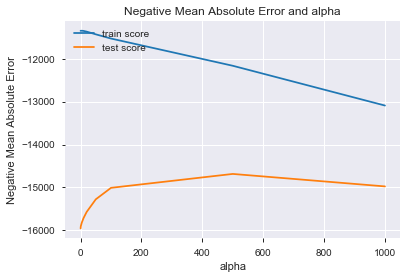

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
best_alpha=model_cv.best_params_['alpha']
best_alpha

500

## With above graph and the 'best_param' method tells that best alpha = 500

In [94]:
alpha = best_alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
lasso.coef_

array([-5.46380600e+03,  4.70797929e+02,  4.38548881e+03,  1.18692106e+04,
        4.18086420e+03,  4.43223810e+02,  3.80887584e+03,  2.06288953e+03,
        3.41990774e+03,  6.32051232e+03, -0.00000000e+00,  4.76623143e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.01943825e+04,  1.08753188e+03,  0.00000000e+00,  4.24786148e+02,
       -0.00000000e+00,  3.25069389e+03,  6.12883396e+02,  1.92877338e+03,
        1.60951835e+03,  3.48375224e+03,  1.22721942e+03,  2.06185186e+03,
       -0.00000000e+00, -6.54506646e+03, -1.68054936e+03, -0.00000000e+00,
       -0.00000000e+00,  7.50713140e+02, -0.00000000e+00,  1.49250632e+01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.41805174e+03, -7.84133962e+02, -0.00000000e+00,  6.60968257e+02,
       -4.43470076e+02, -2.52164569e+02,  0.00000000e+00,  3.07775723e+02,
       -8.66230383e+01,  0.00000000e+00,  1.24158006e+03,  1.32326923e+03,
        3.46466753e+02, -

In [96]:
# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9222118720430832
0.912687831404487


In [97]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 175498.987),
 ('MSSubClass', -5463.806),
 ('LotFrontage', 470.798),
 ('LotArea', 4385.489),
 ('OverallQual', 11869.211),
 ('OverallCond', 4180.864),
 ('MasVnrArea', 443.224),
 ('ExterQual', 3808.876),
 ('BsmtQual', 2062.89),
 ('BsmtExposure', 3419.908),
 ('BsmtFinSF1', 6320.512),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 4766.231),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 20194.383),
 ('BsmtFullBath', 1087.532),
 ('FullBath', 0.0),
 ('HalfBath', 424.786),
 ('BedroomAbvGr', -0.0),
 ('KitchenQual', 3250.694),
 ('TotRmsAbvGrd', 612.883),
 ('Fireplaces', 1928.773),
 ('GarageCars', 1609.518),
 ('GarageArea', 3483.752),
 ('WoodDeckSF', 1227.219),
 ('OpenPorchSF', 2061.852),
 ('MoSold', -0.0),
 ('YearBuilt_age', -6545.066),
 ('YearRemodAdd_age', -1680.549),
 ('GarageYrBlt_age', -0.0),
 ('YrSold_age', -0.0),
 ('MSZoning_FV', 750.713),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 14.925),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', -

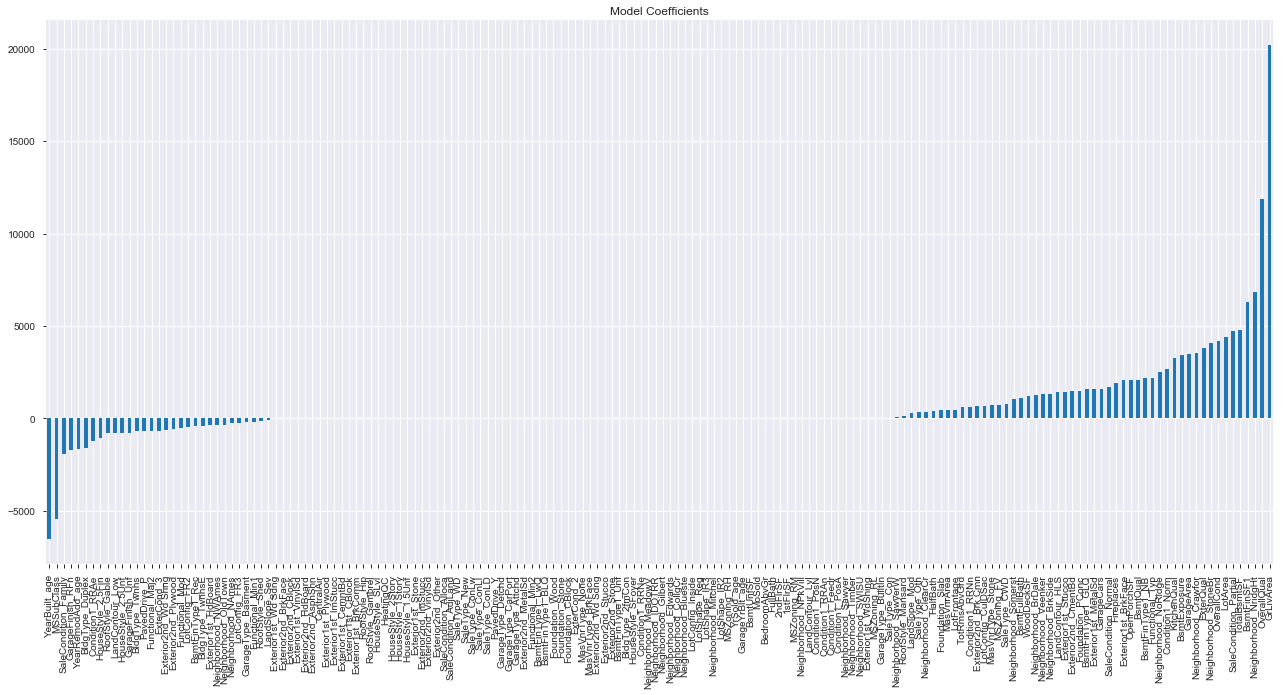

In [98]:
# plotting the magnitude of coefficients

plt.figure(figsize=[22,10])
predictors = X_train.columns
coef = Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

# OBSERVATIONS :

- We see with both Ridge and Lass regression, prediction accuracy seems to be similar -
- r2 score for train data for ridge regression is 92% and lasso regression is - 92%
- r2 score for test data for ridge regression is 90% and lasso regression is - 91%

- On accuracy front, lasso regression model seems to be giving more accurate results as compared to ridge regression model.

- Also, as we know when we deal with more features, and expect interpretability from the model, we choose Lasso, in case there is not much difference in accuracy, because Lasso also helps in feature elimination, hence in this case, I will go for Lasso model

- Also, since the insignificant features are eliminated in Lasso model, it becomes much easier to answer the critical questions that business has asked, like which predictors to focus on while buying a property etc


## Continuing the analysis using Lasso Regression Model

## Check the top predictors based on Lasso Model

In [99]:
coeff_df = pd.Series(lasso.coef_, index = X.columns)

In [100]:
pd.DataFrame(coeff_df.sort_values(ascending=False))[:20]

0
GrLivArea              20194.382530
OverallQual            11869.210604
Neighborhood_NridgHt    6863.635558
BsmtFinSF1              6320.512321
TotalBsmtSF             4766.231428
SaleCondition_Partial   4701.736129
LotArea                 4385.488808
OverallCond             4180.864198
Neighborhood_StoneBr    4101.811162
ExterQual               3808.875842
Neighborhood_Crawfor    3531.369290
GarageArea              3483.752240
BsmtExposure            3419.907741
KitchenQual             3250.693886
Condition1_Norm         2674.072647
Neighborhood_NoRidge    2499.579580
Functional_Typ          2209.042643
BsmtFinType1_NB         2188.721577
BsmtQual                2062.889530
OpenPorchSF             2061.851856

In [101]:
pd.DataFrame(coeff_df.sort_values(ascending=True))[:20]

0
YearBuilt_age        -6545.066461
MSSubClass           -5463.805998
SaleCondition_Family -1927.103144
GarageFinish_RFn     -1706.923640
YearRemodAdd_age     -1680.549359
BldgType_Duplex      -1593.131492
Condition1_RRAe      -1234.347338
HouseStyle_2.5Fin    -1060.826104
RoofStyle_Gable       -803.873362
LandContour_Low       -784.133962
HouseStyle_2.5Unf     -780.684355
GarageFinish_Unf      -767.044373
BldgType_Twnhs        -703.809506
PavedDrive_P          -696.290899
Functional_Maj2       -690.367641
ExterCond_3           -682.579595
Exterior2nd_Wd Shng   -616.840188
Exterior2nd_Plywood   -581.168372
Functional_Mod        -504.448622
LotConfig_FR2         -443.470076

# End of Analysis